#### <i> Machine Learning-Based Risk Prediction Model for Loan Applications Enhancing Decision-Making and Default Prevention </i>
#### <i> Dataset Link --> https://www.kaggle.com/datasets/vedaantsingh/loan-application-risk-prediction-data </i>
#### <i> Import Library Files </i>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


#### <i> Load The Main Dataset </i>

In [4]:
df = pd.read_csv("loan_applications.csv")
df

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0
...,...,...,...,...,...,...,...
8842,8681053,17/11/2020,5000,60,Employed - full time,Wedding,0
8843,8768469,20/11/2020,8000,24,Employed - full time,Wedding,0
8844,8794971,22/11/2020,1000,36,Employed - full time,Wedding deposit,0
8845,8875138,24/11/2020,10000,60,Self employed,Wedding,0


#### <i> Dataset Overview </i>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UID              8847 non-null   int64 
 1   ApplicationDate  8847 non-null   object
 2   Amount           8847 non-null   int64 
 3   Term             8847 non-null   int64 
 4   EmploymentType   8847 non-null   object
 5   LoanPurpose      8847 non-null   object
 6   Success          8847 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 483.9+ KB


In [7]:
df.describe()

,UID,Amount,Term,Success
count,8.847000e+03,8847.000000,8847.000000,8847.000000
mean,4.753101e+06,7560.692438,41.985080,0.104216
std,2.766232e+06,5309.138911,16.139168,0.305558
min,2.160090e+05,500.000000,12.000000,0.000000
25%,2.376933e+06,3000.000000,24.000000,0.000000
50%,4.463541e+06,6500.000000,48.000000,0.000000
75%,7.194733e+06,10000.000000,60.000000,0.000000
max,9.684478e+06,20000.000000,60.000000,1.000000


#### <i> Little Preprocessing </i>

In [9]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()  # Drop rows with missing values

# Convert date column to datetime format
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Encode categorical variables (EmploymentType, LoanPurpose)
df['EmploymentType'] = df['EmploymentType'].astype('category').cat.codes
df['LoanPurpose'] = df['LoanPurpose'].astype('category').cat.codes

# Display dataset after preprocessing
print(df.head())


Missing Values:
 UID                0
ApplicationDate    0
Amount             0
Term               0
EmploymentType     0
LoanPurpose        0
Success            0
dtype: int64
       UID ApplicationDate  Amount  Term  EmploymentType  LoanPurpose  Success
0  4921736      2020-03-07    2000    60               0         1536        0
1  1241981      2020-04-02    3000    60               0         1450        0
2  5751748      2020-02-08   20000    60               0          126        0
3  7163425             NaT   20000    60               3         1121        0
4   227377      2020-01-01    5000    36               0         1705        0


### <i> Expolatory Data Analysis And Visulization </i>

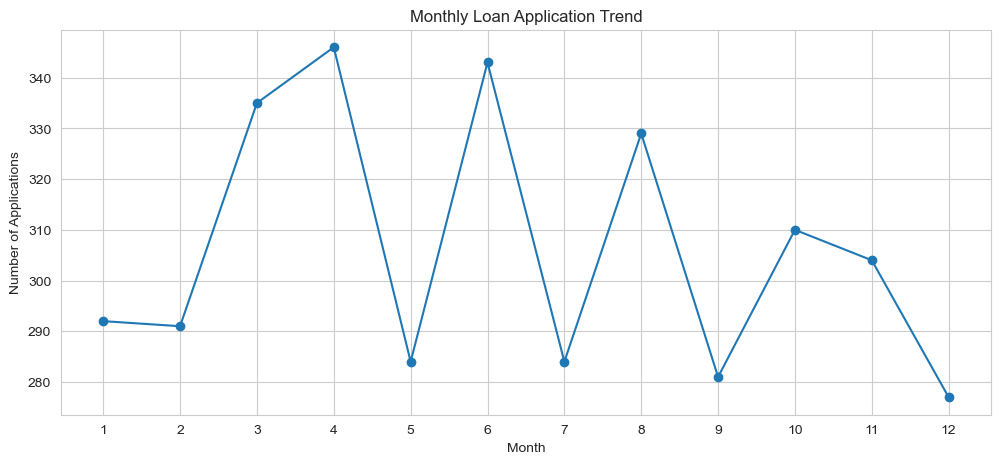

In [11]:
# Set style
sns.set_style("whitegrid")

# 1. Loan Application Trend Over Time
plt.figure(figsize=(12, 5))
df.groupby(df['ApplicationDate'].dt.month)['UID'].count().plot(kind='line', marker='o')
plt.title("Monthly Loan Application Trend")
plt.xlabel("Month")
plt.ylabel("Number of Applications")
plt.xticks(range(1, 13))
plt.show()

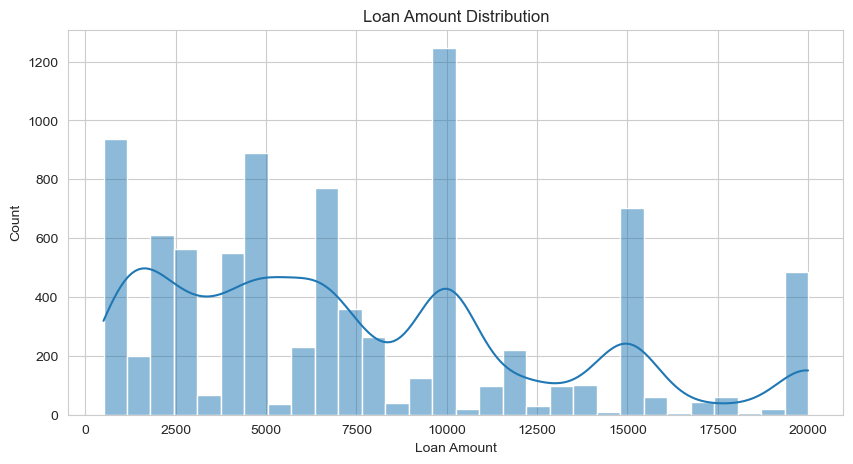

In [12]:
# 2. Loan Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.show()

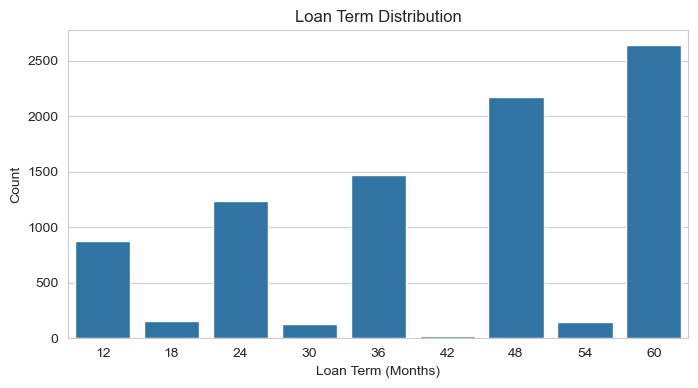

In [13]:
# 3. Loan Term Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Term'])
plt.title("Loan Term Distribution")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Count")
plt.show()


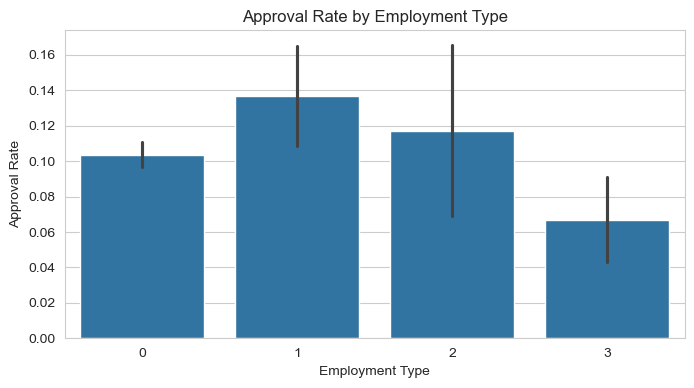

In [14]:
# 4. Employment Type vs. Loan Success
plt.figure(figsize=(8, 4))
sns.barplot(x=df['EmploymentType'], y=df['Success'])
plt.title("Approval Rate by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Approval Rate")
plt.show()


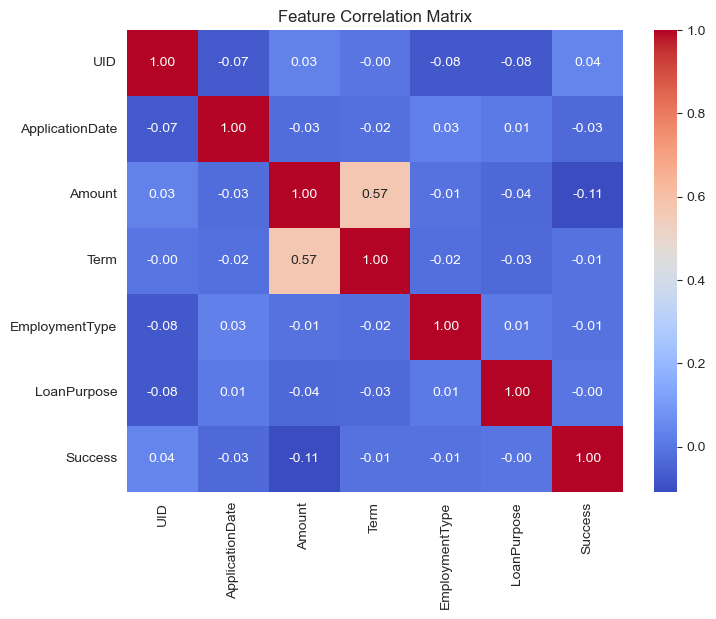

In [15]:
# 6. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

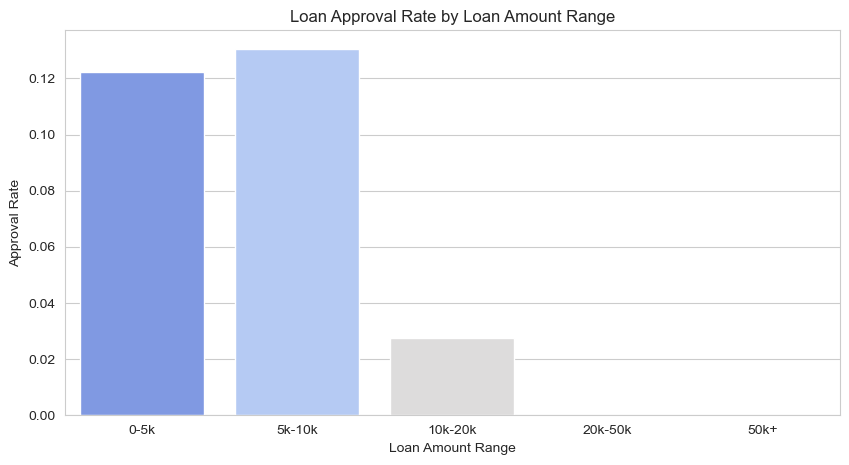

In [16]:
# 1. Success Rate vs. Loan Amount (Binned)
df['LoanAmountBin'] = pd.cut(df['Amount'], bins=[0, 5000, 10000, 20000, 50000, 100000], labels=['0-5k', '5k-10k', '10k-20k', '20k-50k', '50k+'])
plt.figure(figsize=(10, 5))
sns.barplot(x=df['LoanAmountBin'], y=df['Success'], ci=None, palette="coolwarm")
plt.title("Loan Approval Rate by Loan Amount Range")
plt.xlabel("Loan Amount Range")
plt.ylabel("Approval Rate")
plt.show()

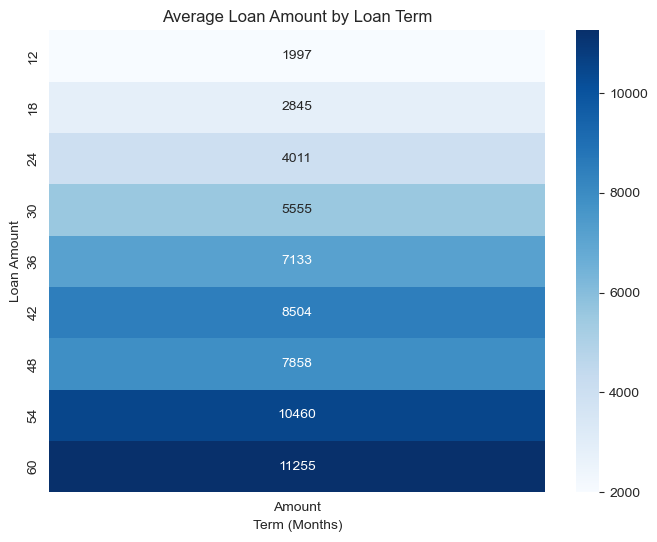

In [17]:
# 2. Loan Term vs. Loan Amount Heatmap
pivot_table = df.pivot_table(values='Amount', index='Term', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt=".0f")
plt.title("Average Loan Amount by Loan Term")
plt.xlabel("Term (Months)")
plt.ylabel("Loan Amount")
plt.show()

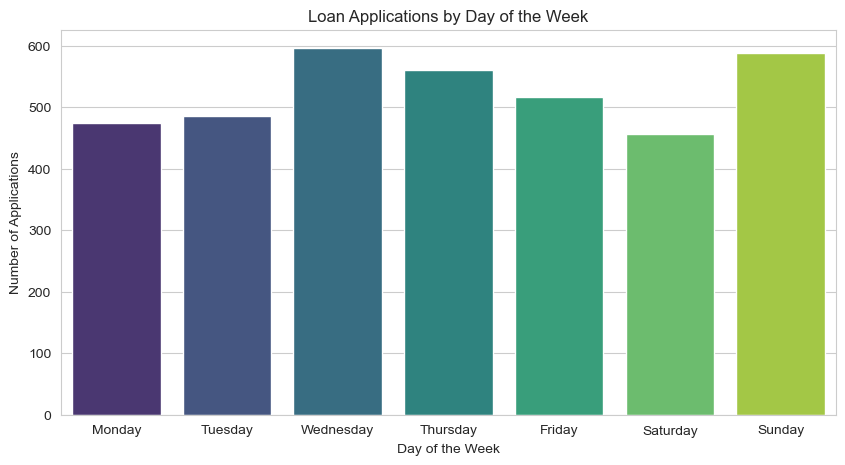

In [18]:
# 3. Loan Application Trend by Day of the Week
df['DayOfWeek'] = df['ApplicationDate'].dt.day_name()
plt.figure(figsize=(10, 5))
sns.countplot(x=df['DayOfWeek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="viridis")
plt.title("Loan Applications by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Applications")
plt.show()

#### <i> Load The Other Dataset For Visulization </i>

In [20]:
df_1 = pd.read_csv("credit_features_subset.csv")
df_1

,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts
0,216009,227,12,14,11,0,3,0,3,71.36,9292,9292,-1,7
1,217537,49,10,7,6,1,3,1,1,29.33,4592,4592,-1,7
2,221803,134,0,12,11,0,3,5,1,32.33,2737,2737,-1,7
3,222260,227,2,39,12,0,2,2,27,41.56,9229,9229,-1,7
4,222848,132,2,99,11,8,0,9,88,43.34,15443,15443,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8842,9679857,399,13,23,16,0,0,0,7,118.09,187302,23018,-1,0
8843,9680193,217,23,5,4,0,0,0,1,85.40,264,264,-1,0
8844,9681405,3,1,2,2,0,0,2,0,2.00,0,0,-1,0
8845,9684198,178,15,23,17,0,1,0,6,66.91,10071,10071,-1,7


In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UID                                   8847 non-null   int64  
 1   ALL_AgeOfOldestAccount                8847 non-null   int64  
 2   ALL_AgeOfYoungestAccount              8847 non-null   int64  
 3   ALL_Count                             8847 non-null   int64  
 4   ALL_CountActive                       8847 non-null   int64  
 5   ALL_CountClosedLast12Months           8847 non-null   int64  
 6   ALL_CountDefaultAccounts              8847 non-null   int64  
 7   ALL_CountOpenedLast12Months           8847 non-null   int64  
 8   ALL_CountSettled                      8847 non-null   int64  
 9   ALL_MeanAccountAge                    8847 non-null   float64
 10  ALL_SumCurrentOutstandingBal          8847 non-null   int64  
 11  ALL_SumCurrentOut

In [22]:
df_1.describe()

,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts
count,8.847000e+03,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8.847000e+03,8847.000000,8847.0,8847.000000
mean,4.753101e+06,162.694021,8.587431,17.515316,9.258506,1.589691,1.380355,2.453487,8.231491,57.285159,5.416258e+04,12858.636148,-1.0,2.057647
std,2.766232e+06,94.569878,13.081866,13.900171,4.896900,2.611921,2.749450,2.964837,11.419963,29.132180,1.074432e+05,17756.568825,0.0,3.139938
min,2.160090e+05,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.0,-1.000000
25%,2.376933e+06,100.000000,2.000000,9.000000,6.000000,0.000000,0.000000,1.000000,2.000000,38.770000,3.396000e+03,2438.000000,-1.0,0.000000
50%,4.463541e+06,151.000000,5.000000,15.000000,9.000000,1.000000,0.000000,2.000000,5.000000,53.120000,1.267000e+04,8336.000000,-1.0,0.000000
75%,7.194733e+06,212.000000,10.000000,22.000000,12.000000,2.000000,2.000000,3.000000,10.000000,71.530000,6.171250e+04,17990.500000,-1.0,7.000000
max,9.684478e+06,999.000000,258.000000,233.000000,43.000000,60.000000,23.000000,62.000000,215.000000,304.000000,4.004808e+06,581415.000000,-1.0,7.000000


#### <i> EDA And VIsulization </i>

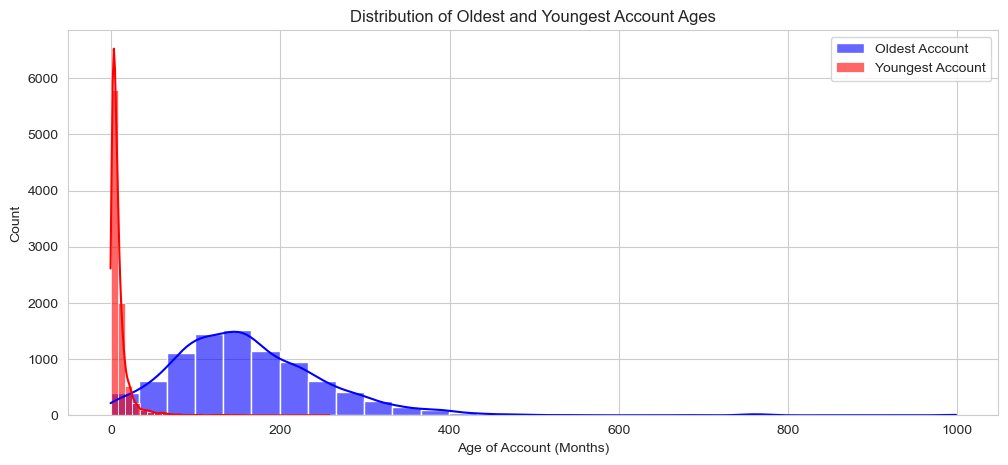

In [24]:
# Set style
sns.set_style("whitegrid")

# 1. Distribution of Account Ages
plt.figure(figsize=(12, 5))
sns.histplot(df_1['ALL_AgeOfOldestAccount'], bins=30, kde=True, label='Oldest Account', color='blue', alpha=0.6)
sns.histplot(df_1['ALL_AgeOfYoungestAccount'], bins=30, kde=True, label='Youngest Account', color='red', alpha=0.6)
plt.title("Distribution of Oldest and Youngest Account Ages")
plt.xlabel("Age of Account (Months)")
plt.ylabel("Count")
plt.legend()
plt.show()

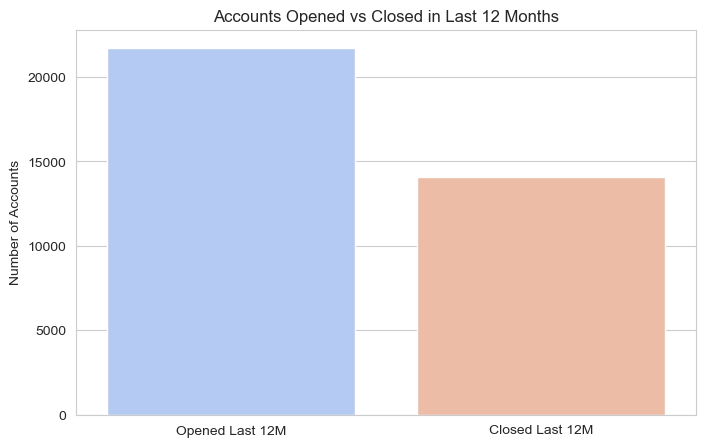

In [25]:
# 2. Accounts Opened and Closed in the Last 12 Months
plt.figure(figsize=(8, 5))
sns.barplot(x=['Opened Last 12M', 'Closed Last 12M'], y=[df_1['ALL_CountOpenedLast12Months'].sum(), df_1['ALL_CountClosedLast12Months'].sum()], palette="coolwarm")
plt.title("Accounts Opened vs Closed in Last 12 Months")
plt.ylabel("Number of Accounts")
plt.show()

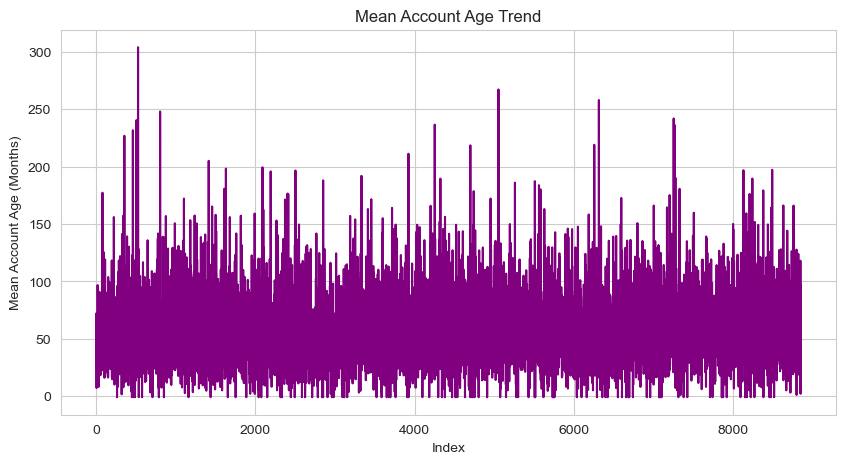

In [26]:
# 3. Mean Account Age Trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_1.index, y=df_1['ALL_MeanAccountAge'], color='purple')
plt.title("Mean Account Age Trend")
plt.xlabel("Index")
plt.ylabel("Mean Account Age (Months)")
plt.show()

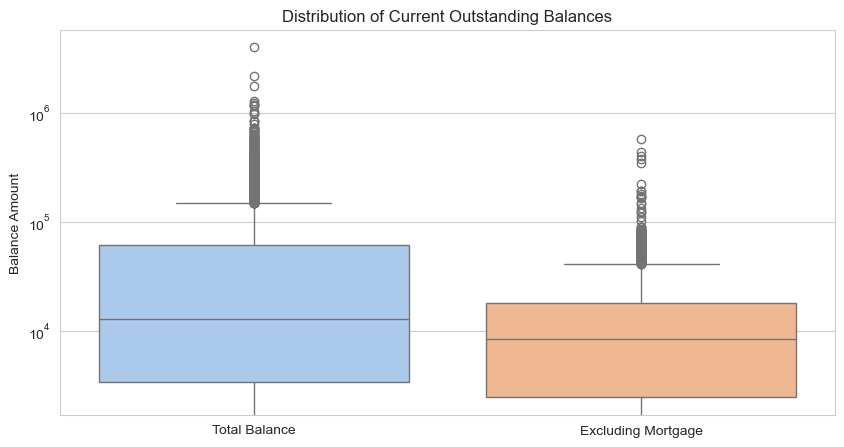

In [27]:
# 4. Outstanding Balance Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_1[['ALL_SumCurrentOutstandingBal', 'ALL_SumCurrentOutstandingBalExcMtg']], palette="pastel")
plt.title("Distribution of Current Outstanding Balances")
plt.xticks([0, 1], ['Total Balance', 'Excluding Mortgage'])
plt.ylabel("Balance Amount")
plt.yscale('log')  # Log scale for better visualization
plt.show()

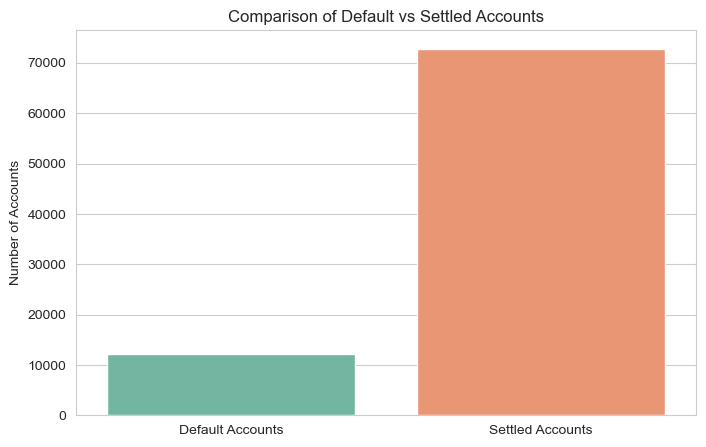

In [28]:
# 5. Default vs Settled Accounts
plt.figure(figsize=(8, 5))
sns.barplot(x=['Default Accounts', 'Settled Accounts'], y=[df_1['ALL_CountDefaultAccounts'].sum(), df_1['ALL_CountSettled'].sum()], palette="Set2")
plt.title("Comparison of Default vs Settled Accounts")
plt.ylabel("Number of Accounts")
plt.show()

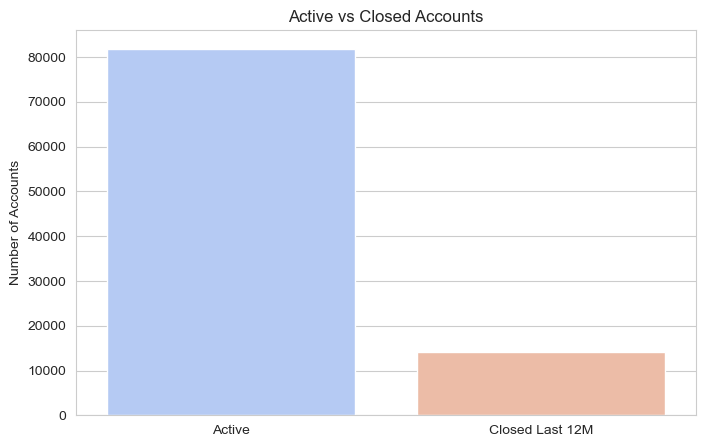

In [29]:
# 8. Active vs. Closed Accounts
plt.figure(figsize=(8, 5))
sns.barplot(x=['Active', 'Closed Last 12M'], y=[df_1['ALL_CountActive'].sum(), df_1['ALL_CountClosedLast12Months'].sum()], palette="coolwarm")
plt.title("Active vs Closed Accounts")
plt.ylabel("Number of Accounts")
plt.show()

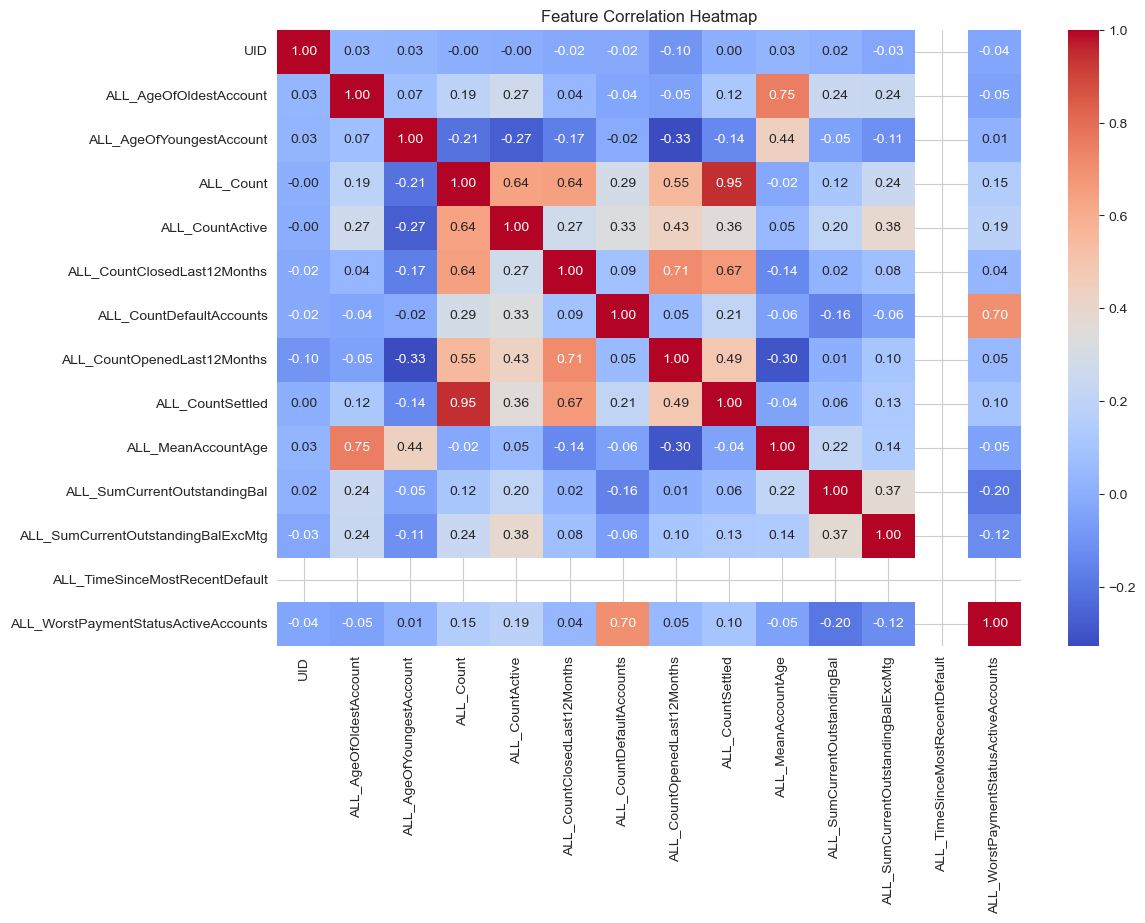

In [30]:
# 9. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### <i> Data Preprocessing </i>

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset (assuming df is already loaded)
df = df.copy()  # Make a copy to avoid modifying the original data

# 1. Handling Missing Values
print("Missing Values Before Processing:\n", df.isnull().sum())

# Drop rows where 'ApplicationDate' is missing since it's crucial for time-based analysis
df.dropna(subset=['ApplicationDate'], inplace=True)

# Confirm missing values are handled
print("Missing Values After Processing:\n", df.isnull().sum())

# 2. Convert ApplicationDate to datetime and extract useful features
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Extracting Date-Based Features
df['Application_Year'] = df['ApplicationDate'].dt.year
df['Application_Month'] = df['ApplicationDate'].dt.month
df['Application_Day'] = df['ApplicationDate'].dt.day
df['Application_Weekday'] = df['ApplicationDate'].dt.weekday  # 0 = Monday, 6 = Sunday

# Drop the original date column after extracting features
df.drop(columns=['ApplicationDate'], inplace=True)

# 3. Encoding Categorical Variables
# Encoding EmploymentType (Label Encoding)
employment_encoder = LabelEncoder()
df['EmploymentType_Encoded'] = employment_encoder.fit_transform(df['EmploymentType'])

# One-Hot Encoding LoanPurpose (since it may have multiple unique values)
df = pd.get_dummies(df, columns=['LoanPurpose'], prefix='Loan')

# Drop original categorical column after encoding
df.drop(columns=['EmploymentType'], inplace=True)

# 4. Feature Engineering: Creating new meaningful features
df['Loan_to_Term_Ratio'] = df['Amount'] / df['Term']  # Loan amount per month of term
df['Loan_Size_Category'] = pd.cut(df['Amount'], bins=[0, 5000, 20000, 50000, 100000, np.inf], labels=[1, 2, 3, 4, 5])  # Categorizing loan size

# 5. Feature Scaling
scaler = StandardScaler()
df[['Amount', 'Term', 'Loan_to_Term_Ratio']] = scaler.fit_transform(df[['Amount', 'Term', 'Loan_to_Term_Ratio']])

# 6. Final Cleaned Dataset
print("\nProcessed Dataset:\n", df.head())




Missing Values Before Processing:
 UID                   0
ApplicationDate    5171
Amount                0
Term                  0
EmploymentType        0
LoanPurpose           0
Success               0
LoanAmountBin         0
DayOfWeek          5171
dtype: int64
Missing Values After Processing:
 UID                0
ApplicationDate    0
Amount             0
Term               0
EmploymentType     0
LoanPurpose        0
Success            0
LoanAmountBin      0
DayOfWeek          0
dtype: int64

Processed Dataset:
        UID    Amount      Term  Success LoanAmountBin  DayOfWeek  \
0  4921736 -1.022346  1.119803        0          0-5k   Saturday   
1  1241981 -0.833069  1.119803        0          0-5k   Thursday   
2  5751748  2.384646  1.119803        0       10k-20k   Saturday   
4   227377 -0.454514 -0.344716        0          0-5k  Wednesday   
5   231767  0.529728  1.119803        0       10k-20k  Wednesday   

   Application_Year  Application_Month  Application_Day  Application_W

### <i> Modeling </i>
### <i> Logistic Regression </i>

In [34]:
# Ensure all categorical variables are properly encoded
X = df.drop(columns=['Success', 'UID'])  # Drop target and unique identifier

# Convert categorical columns to numeric (if any are left)
X = pd.get_dummies(X, drop_first=True)  

# Fill any missing values that may have been introduced
X.fillna(0, inplace=True)

# Convert to float to ensure compatibility with ML models
X = X.astype(float)

# Define target variable
y = df['Success']

# Train-test split
from sklearn.model_selection import train_test_split



# Split data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("📌 Logistic Regression Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



📌 Logistic Regression Model Evaluation
Accuracy: 0.907608695652174

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       668
           1       0.00      0.00      0.00        68

    accuracy                           0.91       736
   macro avg       0.45      0.50      0.48       736
weighted avg       0.82      0.91      0.86       736


Confusion Matrix:
 [[668   0]
 [ 68   0]]


### <i> Random Forest CLassifier </i>

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("📌 Random Forest Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


📌 Random Forest Model Evaluation
Accuracy: 0.9035326086956522

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       668
           1       0.00      0.00      0.00        68

    accuracy                           0.90       736
   macro avg       0.45      0.50      0.47       736
weighted avg       0.82      0.90      0.86       736


Confusion Matrix:
 [[665   3]
 [ 68   0]]


### <i> XGB Classifier </i>

In [38]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("📌 XGBoost Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


📌 XGBoost Model Evaluation
Accuracy: 0.8967391304347826

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       668
           1       0.28      0.07      0.12        68

    accuracy                           0.90       736
   macro avg       0.60      0.53      0.53       736
weighted avg       0.85      0.90      0.87       736


Confusion Matrix:
 [[655  13]
 [ 63   5]]


#### <i> Comparison Of All Models </i>

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Evaluate each model
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Store results
results = {name: evaluate_model(model, X_test, y_test) for name, model in models.items()}


In [41]:
import pandas as pd

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T

# Sort models by highest Accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Display comparison table
print("📊 Model Performance Comparison:")
print(results_df)


📊 Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.907609   0.000000  0.000000  0.000000
Random Forest        0.903533   0.000000  0.000000  0.000000
XGBoost              0.896739   0.277778  0.073529  0.116279


<Figure size 1000x600 with 0 Axes>

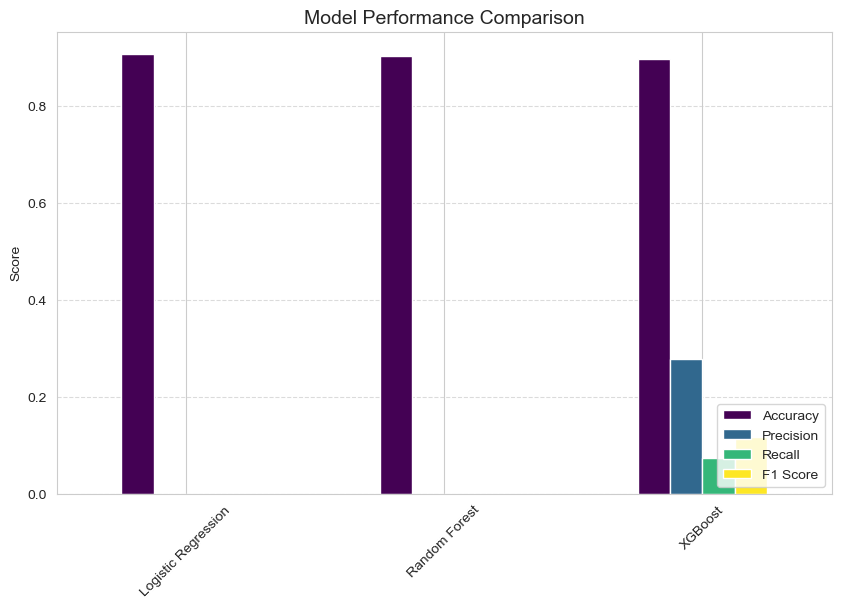

In [42]:
import matplotlib.pyplot as plt

# Plot bar chart for comparison
plt.figure(figsize=(10,6))
results_df.plot(kind="bar", figsize=(10,6), colormap="viridis")
plt.title("Model Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


### <i> ROC Curve Comparison </i>

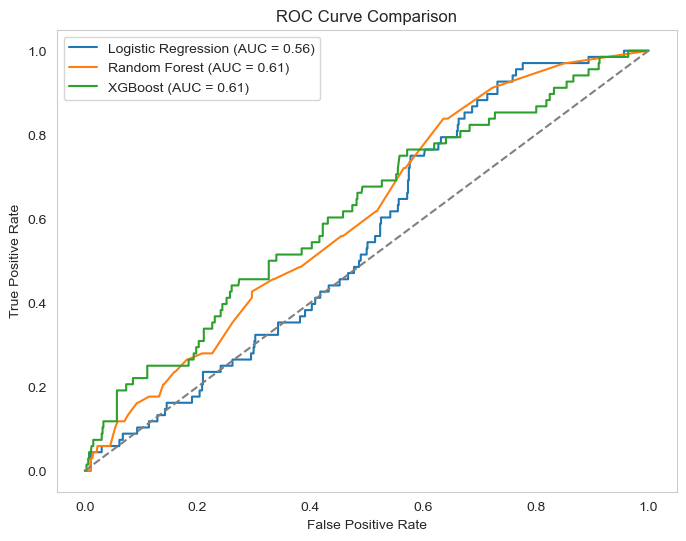

In [44]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

# Loop through models and plot ROC curves
for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:,1]  # Get probabilities
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Calculate ROC
    auc_score = auc(fpr, tpr)  # Calculate AUC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot settings
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()


### <i> Feature Importance For Random Forest And XGBoost </i>

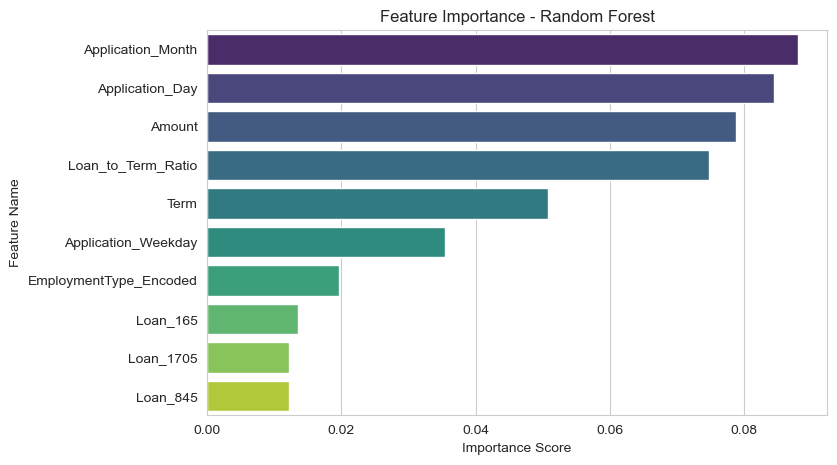

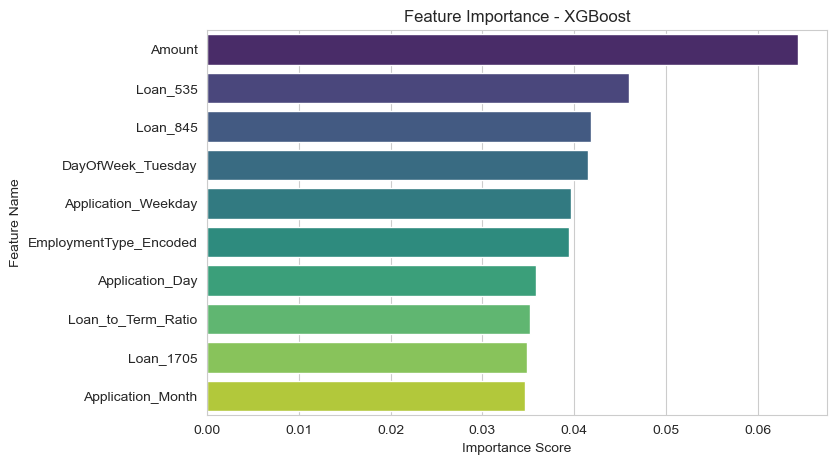

In [46]:
# Plot feature importance for Random Forest & XGBoost
def plot_feature_importance(model, model_name):
    importance = model.feature_importances_
    features = X.columns
    feature_df = pd.DataFrame({"Feature": features, "Importance": importance})
    feature_df = feature_df.sort_values(by="Importance", ascending=False).head(10)  # Top 10 features

    plt.figure(figsize=(8,5))
    sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature Name")
    plt.show()

plot_feature_importance(rf_model, "Random Forest")
plot_feature_importance(xgb_model, "XGBoost")
